# Data Exploration (5/15 marks for Individual Report)

You should do some exploratory data analysis and show your understanding of this dataset. You can start from basic statistical information, such as num Imps, num Clicks, Cost, CTR, avg CPM, eCPC. You can also include further analysis on user feedback, bidding etc. A good example can be found in the paper [1].

**Note** that all numbers related to money (e.g. bid price, paying price and floor price) use the currency of CNY and the unit of Chinese fen x1000, corresponding to the commonly adopted cost-per-mile (CPM) pricing model.

-----

##  SETUP

In [1]:
import os
import sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# data directory
DATA_DIR = os.path.join('..', 'Data')

##  Load all data

In [2]:
# load data
train = pd.read_csv(os.path.join(DATA_DIR, 'train.csv'))
validation = pd.read_csv(os.path.join(DATA_DIR, 'validation.csv'))
test = pd.read_csv(os.path.join(DATA_DIR, 'test.csv'))

data = {"train":train, "valid":validation, "test":test}

In [7]:
set(train.columns)-(set(train.columns)-set(test.columns))

{'IP',
 'adexchange',
 'advertiser',
 'bidid',
 'city',
 'creative',
 'domain',
 'hour',
 'keypage',
 'region',
 'slotformat',
 'slotheight',
 'slotid',
 'slotprice',
 'slotvisibility',
 'slotwidth',
 'url',
 'urlid',
 'useragent',
 'userid',
 'usertag',
 'weekday'}

# BASIC STATISTICAL INFORMATION

- Recall the the costs provided in the dataset are in the unit of Chinese fen x1000

In [8]:
for a,b in data.items():
    print(a, "number of impressions:", len(b))
print("-------")    
try:
    _ = data.pop("test")
except:
    pass

for a,b in data.items():
    print(a, "number of clicks:", len(b[b.click==1]))
print("-------")        
for a,b in data.items():
    print(a, "cost:", (1/1000)*np.sum(b.payprice))
print("-------")    
for a,b in data.items():
    print(a, "CTR:", len(b[b.click==1])/len(b))
print("-------")    
for a,b in data.items():
    print(a, "average CPM:", np.mean(b.payprice))
print("-------")    
for a,b in data.items():
    print(a, "cost per click:", (1/1000)*np.sum(b.payprice)/len(b[b.click==1]))
    # divide by 1000

train number of impressions: 2430981
valid number of impressions: 303925
test number of impressions: 303375
-------
train number of clicks: 1793
valid number of clicks: 202
-------
train cost: 189984.608
valid cost: 23777.27
-------
train CTR: 0.0007375623256619447
valid CTR: 0.0006646376573167722
-------
train average CPM: 78.15141623895867
valid average CPM: 78.23400509994242
-------
train cost per click: 105.95906748466258
valid cost per click: 117.70925742574258


In [9]:
budget = 6250*1000

In [10]:
budget/np.sum(validation.payprice)

0.26285608061817023

# Basic Feature exploration

weekday 7 unique 0.00029%
hour 24 unique 0.00099%
bidid 2430981 unique 100.00000%
userid 2342677 unique 96.36756%
useragent 38 unique 0.00156%
IP 503975 unique 20.73134%
region 35 unique 0.00144%
city 370 unique 0.01522%
adexchange 5 unique 0.00021%
domain 23013 unique 0.94665%
url 763961 unique 31.42604%
urlid 1 unique 0.00004%
slotid 52283 unique 2.15070%
slotwidth 21 unique 0.00086%
slotheight 14 unique 0.00058%
slotvisibility 11 unique 0.00045%
slotformat 4 unique 0.00016%
slotprice 286 unique 0.01176%
creative 131 unique 0.00539%
keypage 19 unique 0.00078%
advertiser 9 unique 0.00037%
usertag 744036 unique 30.60641%


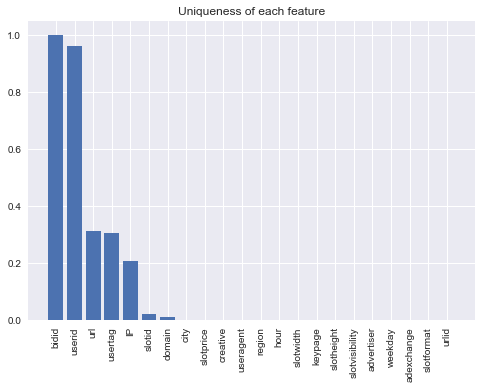

In [75]:
N = len(train)
f_u = {} #feature uniqueness

for col in test.columns:
    l = len(set(train[col]))
    print(str(col), l, "unique", "{0:.5f}%".format(100*l/N))
    f_u[str(col)] = l/N
    
v = sorted(f_u.values(), reverse=True)
k = [x for _,x in sorted(zip(f_u.values(), f_u.keys()), reverse=True)]

### BASIC PLOT TO SHOW THE UNIQUENESS OF EACH FEATURE

plt.bar(range(len(k)), v, align='center')
plt.xticks(range(len(k)), k, rotation='vertical')
plt.title("Uniqueness of each feature")
plt.show()

In [76]:
train.head()

,click,weekday,hour,bidid,userid,useragent,IP,region,city,adexchange,...,slotheight,slotvisibility,slotformat,slotprice,creative,bidprice,payprice,keypage,advertiser,usertag
0,0,5,22,b7bea80521fdecd95d2d761a38c91c3f09618066,2e880fb7d690cf7377b2e42e701728e3f3c0e4c1,windows_ie,125.37.175.*,2,2,2,...,200,2,0,5,a4f763f78ef3eedfe614263b94a8924e,238,5,0f951a030abdaedd733ee8d114ce2944,3427,null
1,0,1,20,4f51205475678f5a124bc76b2c54163bf8eaa7eb,3a1fe01360ff8100e7d006b83b77a3e4c01d928c,windows_chrome,171.36.92.*,238,239,1,...,250,FourthView,Na,0,10722,294,23,null,2821,null
2,0,3,13,b604e3fd054a658ab7ced4285ebf2ef54d2bd890,801d18a056b6fe6b06a794aef17fb0d6daff2414,windows_ie,59.46.106.*,40,41,2,...,250,2,0,5,798b2d49952d77f1eace9f23c210d0b5,238,24,0f951a030abdaedd733ee8d114ce2944,3427,"10052,10006,13866,10110"
3,0,6,23,0348beeae93e561584c3b50fc9e7746a33048ad7,0d6eaf2259699990e38a1fc5116f112070b9ecdc,windows_ie,114.250.226.*,1,1,1,...,600,2,1,0,cb7c76e7784031272e37af8e7e9b062c,300,25,bebefa5efe83beee17a3d245e7c5085b,1458,"13866,10063,10111"
4,0,5,6,268149c1789bce2bc9798ffd97ec431219bafeb3,a239d9bb642460d974ba67f85e63b8d3e214da0e,windows_ie,183.63.192.*,216,233,2,...,90,OtherView,Na,133,7330,277,133,null,2259,null


In [3]:
### actually need to be aware that the usertag is not as simple as it seems

train.usertag = train.usertag.apply(lambda x: x.split(","))
validation.usertag = validation.usertag.apply(lambda x: x.split(","))
test.usertag = test.usertag.apply(lambda x: x.split(","))

sss= set()
for i in train.usertag:    sss |= set(i)
print("there are {} usertags in total train set".format(len(sss)))

ttt= set()
for i in validation.usertag:    ttt |= set(i)
print("there are {} usertags in total valid set".format(len(ttt)))

uuu= set()
for i in test.usertag:    uuu |= set(i)
print("there are {} usertags in total test set".format(len(ttt)))

there are 69 usertags in total train set
there are 69 usertags in total valid set
there are 69 usertags in total test set


In [4]:
# check if usertags are the same across each set

sss==ttt==uuu

True

# User feedback exploration

In [5]:
def visualise_feature_clicks(df, feat, r=False):
    ### get the x axis
    x = set(df[feat])
    ### sort it 
    x = sorted(x)#, reverse=True)
    ### get number of clicks for each
    n = len(x)
    y = np.zeros(n)
    
    for i in range(n):
        y[i] = np.sum(df[df[feat]==x[i]].click)
    
    # what proportion of the clicks belonged to them
    y/= np.sum(df.click)
    
    plt.bar(range(len(x)), y, align='center')
    plt.xticks(range(len(x)), x, rotation='vertical')
    plt.title(feat)
    plt.show()
    if r:
        return x,y

In [6]:
def visualise_feature_ctr(df, feat, r=False, title=""):
    ### get the x axis
    x = set(df[feat])
    ### sort it 
    x = sorted(x)#, reverse=True)
    ### get number of clicks for each
    n = len(x)
    y = np.zeros(n)
    
    for i in range(n):
        y[i] = np.sum(df[df[feat]==x[i]].click)/len(df[df[feat]==x[i]])
    
    # what proportion of the clicks belonged to them
    y/= np.sum(df.click)
    
    plt.bar(range(len(x)), y, align='center')
    plt.xticks(range(len(x)), x, rotation='vertical')
    #plt.title(feat)
    plt.show()
    
    if r:
        return x,y

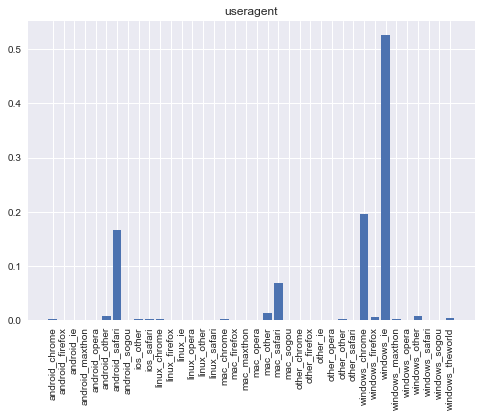

In [79]:
### useragent
a1, a2 = visualise_feature_clicks(train, "useragent", True)

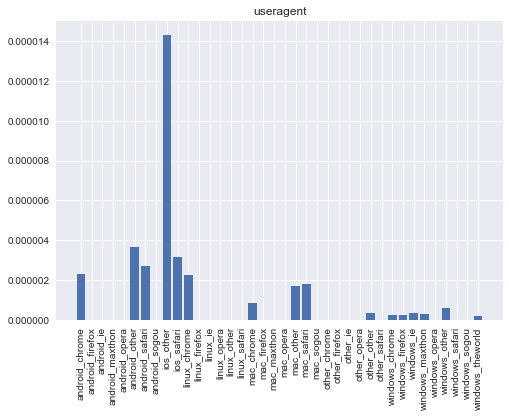

In [53]:
### useragent
visualise_feature_ctr(train, "useragent")

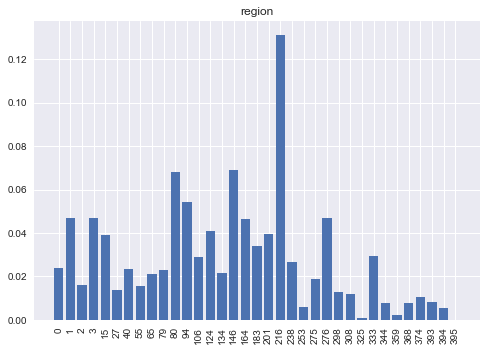

In [54]:
### region
visualise_feature_clicks(train, "region")

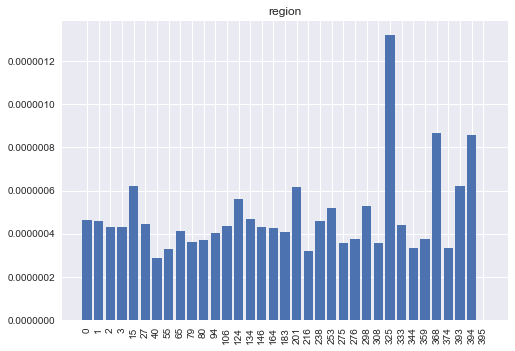

In [55]:
### region
visualise_feature_ctr(train, "region")

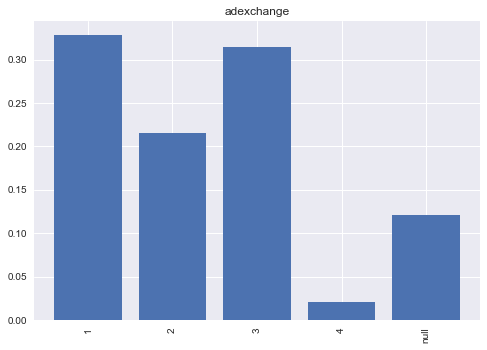

In [56]:
### adexchange
visualise_feature_clicks(train, "adexchange")

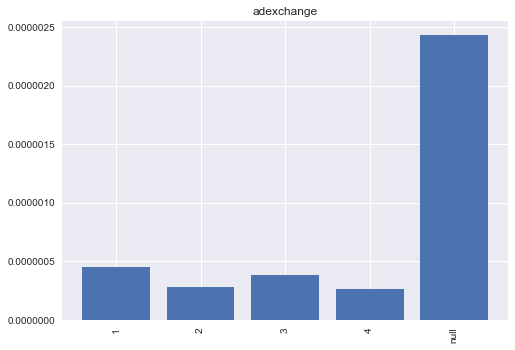

In [57]:
### adexchange
visualise_feature_ctr(train, "adexchange")

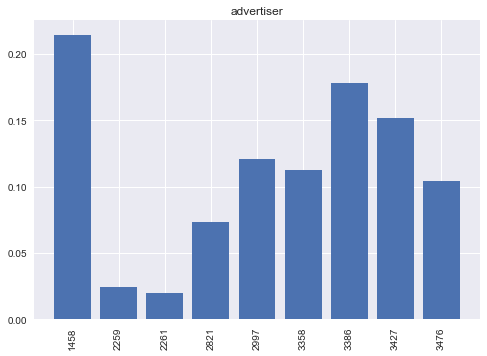

In [58]:
### advertiser
visualise_feature_clicks(train, "advertiser")

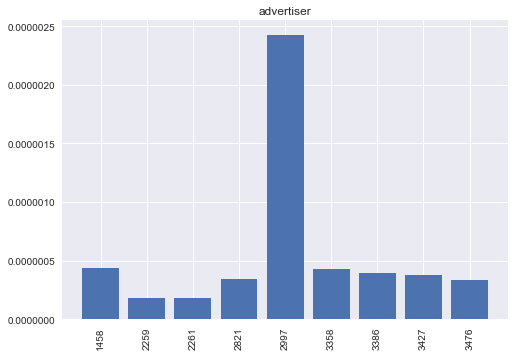

In [59]:
### advertiser
visualise_feature_ctr(train, "advertiser")

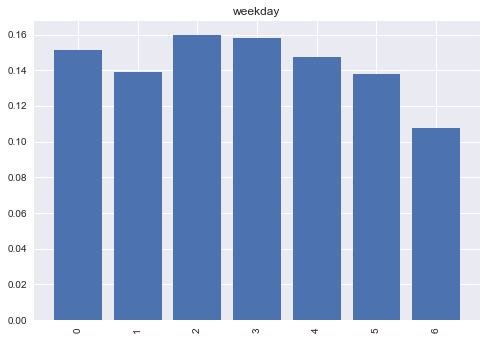

In [60]:
### weekday
visualise_feature_clicks(train, "weekday")

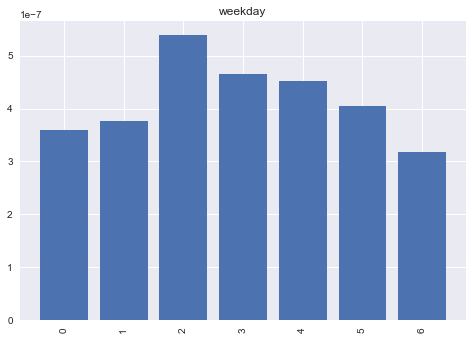

In [61]:
### weekday
visualise_feature_ctr(train, "weekday")

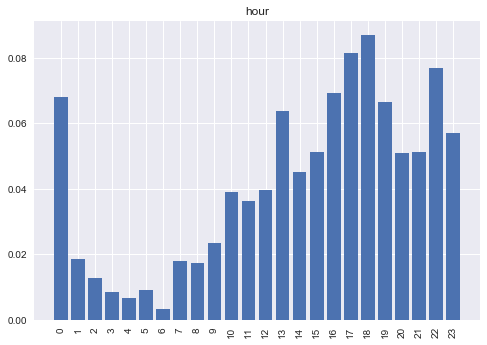

In [62]:
### hour
visualise_feature_clicks(train, "hour")

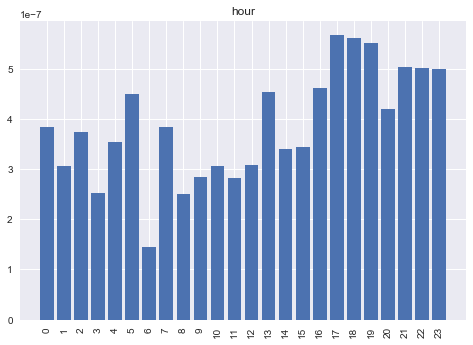

In [63]:
### hour
visualise_feature_ctr(train, "hour")

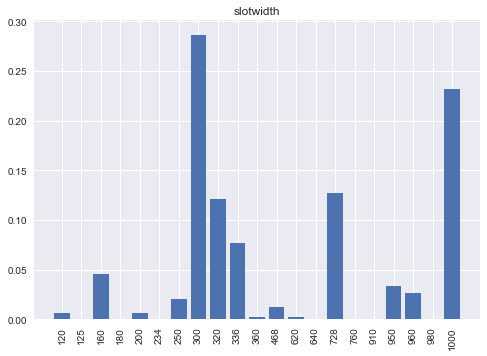

In [64]:
### slot size
visualise_feature_clicks(train, "slotwidth")

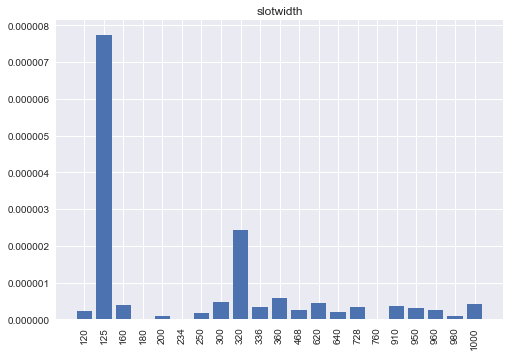

In [65]:
### slot size
visualise_feature_ctr(train, "slotwidth")

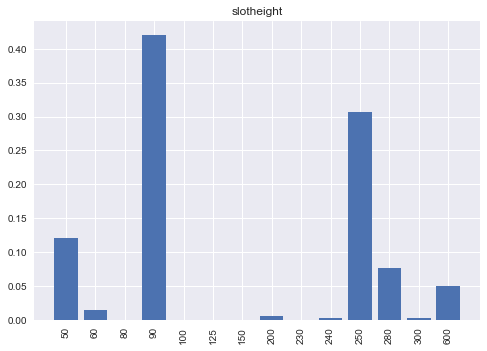

In [66]:
### slot size
visualise_feature_clicks(train, "slotheight")

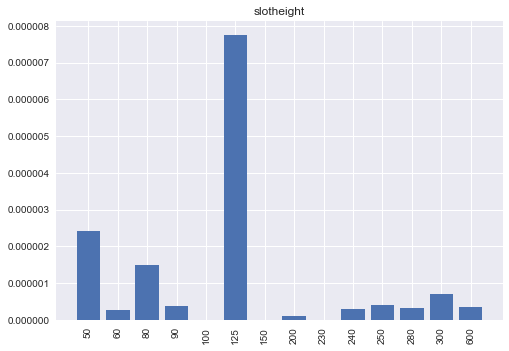

In [67]:
### slot size
visualise_feature_ctr(train, "slotheight")

In [13]:
def get_stats(df, feat):
    """
    returns
        x --- members of the feature in ascending order
        y --- number of impressions for each member
        z --- number of clicks for each member
    """
    x = set(df[feat])
    ### sort it 
    x = sorted(x)#, reverse=True)
    ### get number of clicks for each
    n = len(x)
    y = np.zeros(n)
    z = np.zeros(n)
    
    for i in range(n):
        _ = df[df[feat]==x[i]]
        y[i] = np.sum(_.click)
        z[i] = len(_)
        
    return x,y,z

# useragent

In [21]:
#### SPLIT BY MAC/WINDOWS/OTHER  and CHROME SAFARI OTHER

train.useragent = train.useragent.apply(lambda x: x.split("_"))
train["useragent1"] = train.useragent.apply(lambda x: x[0])
train["useragent2"] = train.useragent.apply(lambda x: x[1])

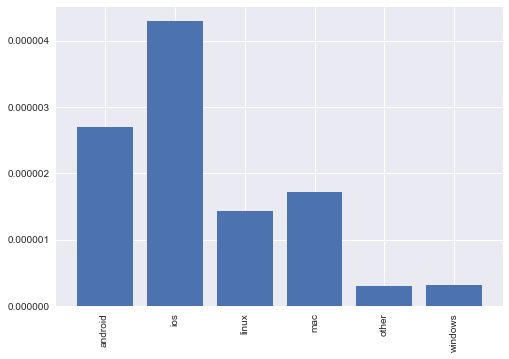

In [34]:
visualise_feature_ctr(train, "useragent1")

In [32]:
get_stats(train, "useragent1")

(['android', 'ios', 'linux', 'mac', 'other', 'windows'],
 array([  3.12000000e+02,   3.00000000e+00,   4.00000000e+00,
          1.48000000e+02,   1.00000000e+00,   1.32500000e+03]),
 array([  6.43590000e+04,   3.90000000e+02,   1.56500000e+03,
          4.79380000e+04,   1.83300000e+03,   2.31489600e+06]))

# adexchange

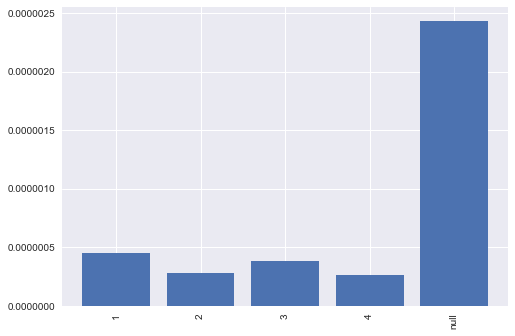

In [37]:
visualise_feature_ctr(train, "adexchange")

In [36]:
get_stats(train, "adexchange")

(['1', '2', '3', '4', 'null'],
 array([ 588.,  386.,  564.,   38.,  217.]),
 array([ 718271.,  763428.,  819458.,   79995.,   49829.]))

# hour

In [46]:
a,b,c = get_stats(train, "hour")
print(a)
print(b)
print(c)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
[ 122.   33.   23.   15.   12.   16.    6.   32.   31.   42.   70.   65.
   71.  114.   81.   92.  124.  146.  156.  119.   91.   92.  138.  102.]
[ 177163.   60331.   34361.   33126.   18874.   19867.   23047.   46490.
   69197.   82399.  127319.  128548.  128602.  140443.  132772.  148867.
  149807.  143504.  155149.  120318.  121228.  102075.  153756.  113738.]


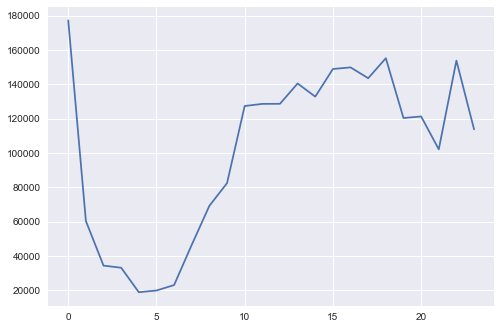

In [47]:
plt.plot(a,c)
plt.show()

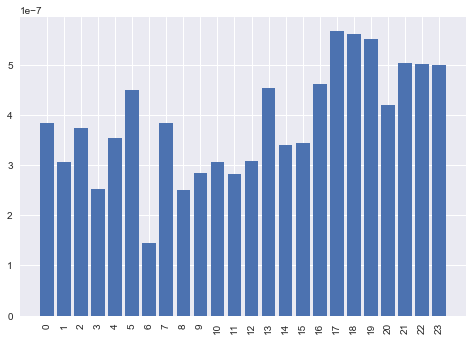

In [48]:
visualise_feature_ctr(train, "hour")

# usertag

In [7]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

train = train.join(pd.DataFrame(mlb.fit_transform(train.pop('usertag')),
                          columns=mlb.classes_,
                          index=train.index))

In [12]:
ids = set(train.columns)-set(validation.columns)

In [15]:
I = sorted(list(ids))

In [17]:
Ns = np.zeros(len(I))
Cs = np.zeros(len(I))

In [22]:
for i,j in zip(I, range(len(I))):
    df = train[train[i]==1]
    Ns[j] = len(df)
    Cs[j] = np.sum(df.click)    

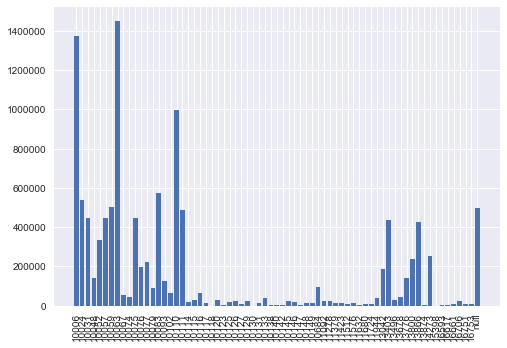

In [27]:
plt.bar(range(len(I)), Ns, align='center')
plt.xticks(range(len(I)), I, rotation='vertical')
plt.show()

In [41]:
_ = Cs/Ns

Ns[np.argmax(_)]/np.sum(Ns)

0.0019005175099669636

In [40]:
Cs[np.argmax(_)]/np.sum(Cs)

0.1000135519718119

In [44]:
I[np.argmax(Cs)]

'10063'

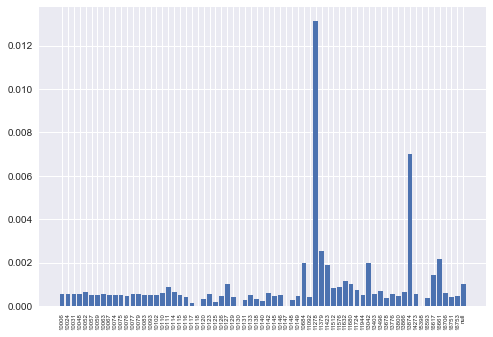

In [39]:
plt.bar(range(len(I)), Cs/Ns, align='center')
plt.xticks(range(len(I)), I, rotation='vertical', fontsize=6)
plt.show()

In [14]:
len(ids)

69

# Price distributions

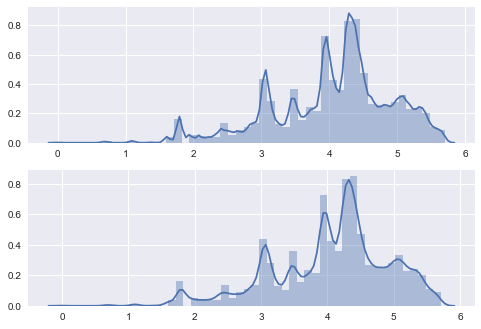

In [7]:
## PAYPRICE
f, (ax1, ax2) = plt.subplots(2)
sns.distplot(np.log1p(train.payprice), ax=ax1)
ax1.set_xlabel("")
sns.distplot(np.log1p(validation.payprice), ax=ax2)
ax2.set_xlabel("")
plt.show()

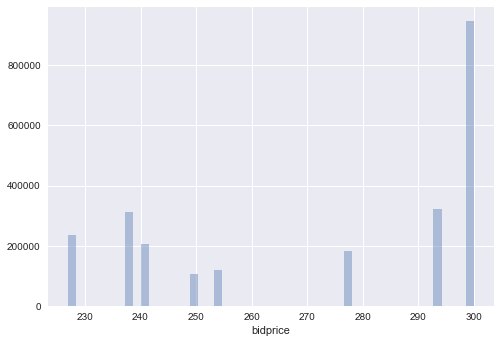

In [8]:
## BID PRICE
sns.distplot(train.bidprice, kde=False)
plt.show()

mean delta: 194.810629947
median delta: 209.0


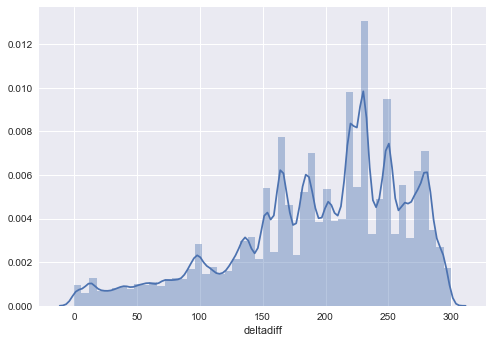

In [47]:
## DELTA DIFF
train['deltadiff'] = train.bidprice - train.payprice
validation['deltadiff'] = validation.bidprice - validation.payprice

print("mean delta:", np.mean(train.deltadiff))
print("median delta:", np.median(train.deltadiff))

sns.distplot(train.deltadiff)
plt.show()